In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

In [14]:
from sklearn.ensemble import RandomForestRegressor

In [18]:
from sklearn.metrics import mean_squared_error

In [3]:
df = pd.read_csv('/Users/Daniyar/Mountains/Data/df_final.csv',index_col="time")

In [4]:
df.head()

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,...,rain_1h_Valencia,rain_3h_Valencia,snow_3h_Valencia,clouds_all_Valencia,weather_broken clouds_Valencia,weather_few clouds_Valencia,weather_light rain_Valencia,weather_others_Valencia,weather_scattered clouds_Valencia,weather_sky is clear_Valencia
time,,,,,,,,,,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,1
2015-01-01 00:00:00+00:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,1
2015-01-01 01:00:00+00:00,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,43.0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,1
2015-01-01 02:00:00+00:00,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,43.0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,1
2015-01-01 03:00:00+00:00,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,43.0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,1


In [8]:
# Define features and target
X = df.drop(columns=['generation solar','generation wind onshore'])
y_solar = df['generation solar']
y_wind = df['generation wind onshore']

In [9]:
def split_by_date(X,train_end_date):
    if not isinstance(train_end_date, pd.Timestamp):
        train_end_date = pd.Timestamp(train_end_date)

    # Convert index of X and y to Timestamp objects if they are strings
    if isinstance(X.index[0], str):
        X.index = pd.to_datetime(X.index)
        
    X_train = X[X.index <= train_end_date]
    X_test = X[X.index > train_end_date]
    
    return X_train, X_test

train_end_date = pd.to_datetime('2017-12-31 23:00:00+00:00')
X_train, X_test = split_by_date(X,train_end_date)

In [10]:
y_solar_train, y_solar_test = split_by_date(y_solar, train_end_date)

In [11]:
y_wind_train, y_wind_test = split_by_date(y_wind, train_end_date)

In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
# Apply Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100,
                                random_state=1)
rf.fit(X_train_scaled, y_solar_train)

RandomForestRegressor(random_state=1)

In [28]:
scoreOfModel = rf.score(X_train_scaled, y_solar_train)


print("Score is calculated as: ",scoreOfModel)

Score is calculated as:  0.9985587592782739


In [33]:
y_pred = rf.predict(X_test_scaled)

In [34]:
mean_squared_error(y_solar_test, y_pred)

49466.308929855004

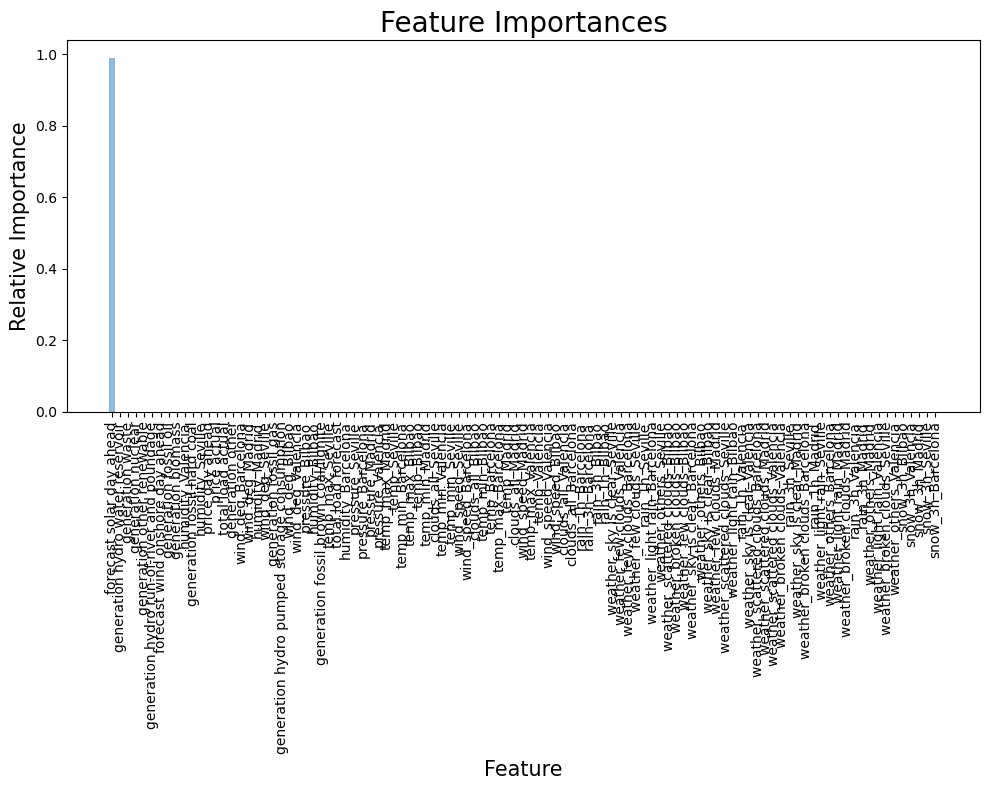

In [36]:
feature_importances = rf.feature_importances_

# Adjusting feature_names to match your processed 'carseats' DataFrame
# Ensure this line comes after all preprocessing steps, including get_dummies and drop
feature_names = X_train.columns

# Sort the feature importances in descending order and get their indices
sorted_indices = np.argsort(feature_importances)[::-1]

# Create the plot
plt.figure(figsize=(10, 8))
plt.title('Feature Importances', fontsize=20)
plt.bar(range(len(feature_importances)), feature_importances[sorted_indices], align='center', alpha=0.5)
plt.xticks(range(len(feature_importances)), feature_names[sorted_indices], rotation=90)
plt.ylabel('Relative Importance', fontsize=15)
plt.xlabel('Feature', fontsize=15)
plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlapping
plt.show()